## NOTES

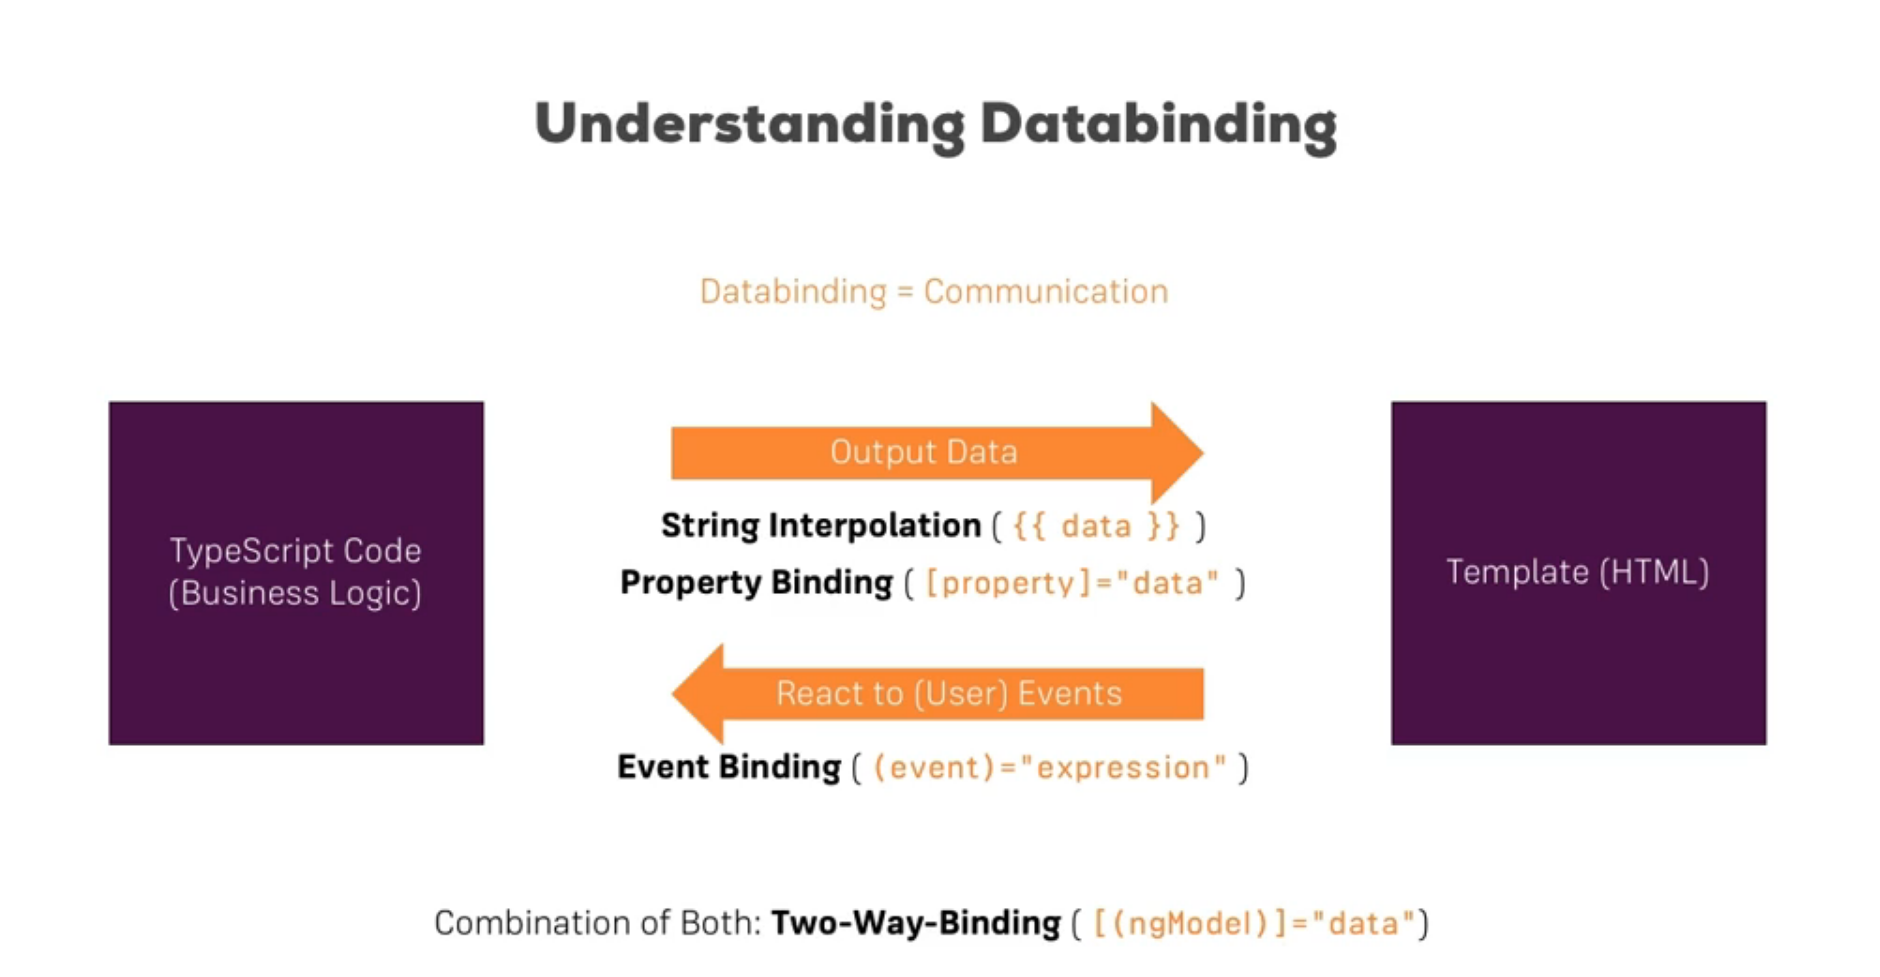

### String Interpolation


**Server Component.ts** 


Can take both value , variable , or even string /// {{'SERVER'}}



or we can Even add a function 


In [ ]:
 getServerStatus(){
        return this.serverStatus;
    }

### Property Binding

**IN HTML**

In [ ]:
<button class = "btn-primary" 
[disabled] = "!allowNewServer">Add Server</button>

**IN TYPESCRIPT**

In [ ]:
export class ServersComponent {
    
  allowNewServer = false;
    
    constructor(){
        setTimeout(() =>{
          this.allowNewServer = true;
        },2000);
    }
}


## Difference between Interpolation and Property Binding

#### Interpolation is used to just display a piece of data in HTML, such as displaying a title or a name. Property binding lets us bind a property of a DOM object, for example the hidden property, to some data value.

### TWO WAY BINDING

In [ ]:

<input type="text" class="form-control" [(ngModel)]="serverName">

# Directives

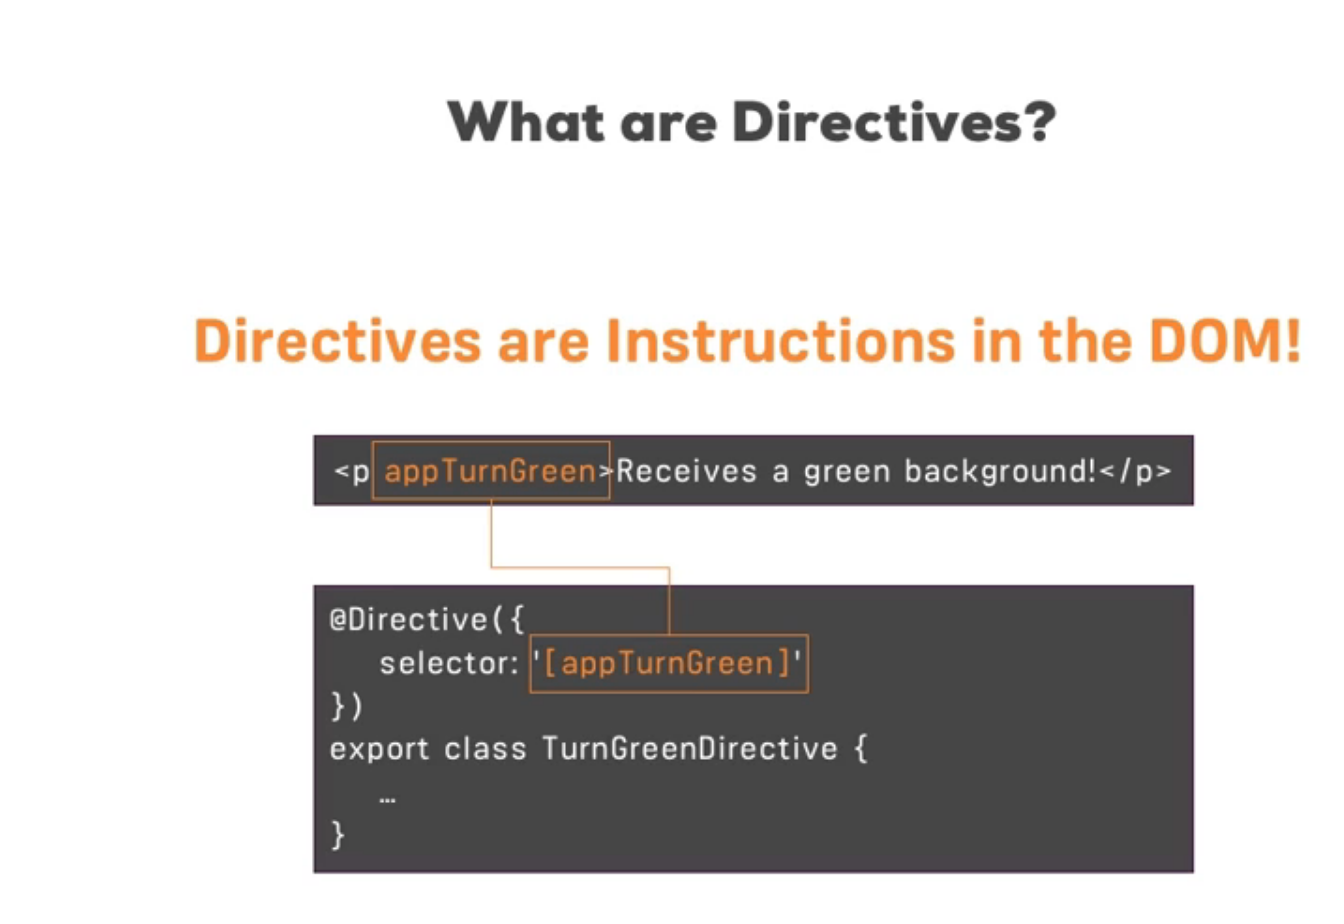

# NG IF ELSE

In [ ]:
<p id = "sec"  *ngIf="serverCreate; else noServer">Server was created , Server Name is {{serverName}}</p>

In [ ]:
<ng-template #noServer>
<p>No server was created</p>
</ng-template>

In [ ]:
<div *ngFor = "let logItem of log ; let i = index"
  [ngStyle]  = "{backgroundColor : i >= 5 ? 'blue' : 'red'}"
>{{logItem}}</div>

In [ ]:
  log = [];
  onToggleDisplay(){
    this.showSecret = !this.showSecret;
    // this.log.push(this.log.length+1);
    this.log.push(new Date())
  }

## Property Bindings

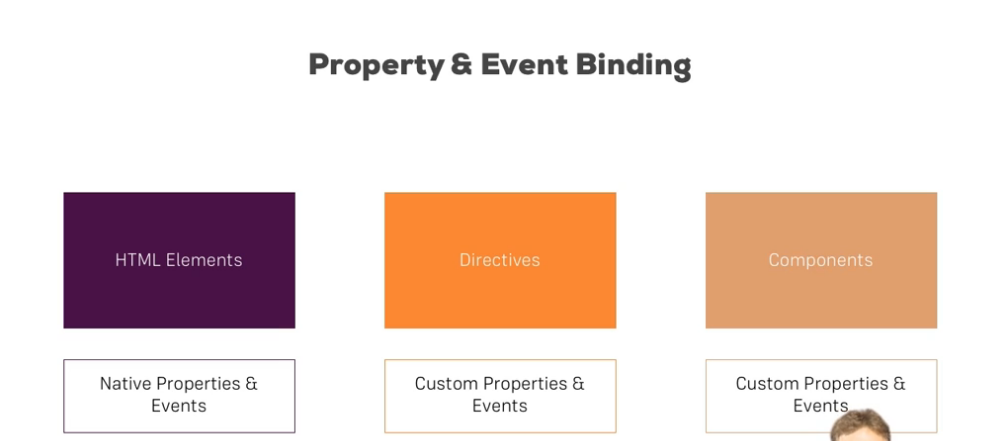

### Properties are only available to the component for accessing those properties outside the components we have to 
### (or if we say if we want our parent component to bind to the child component we have to put a decorator)

In [ ]:
@Input() element : {type : string, name : string , content: "string"};

#### For opposite of Input if we want to make changes in parent component using the childeren we will use Output and a Emiiter


In [ ]:
# Cockpit component
@Output() blueprintCreated  = new EventEmitter<{serverName : string , serverContent : string}>();
   onAddServer() {
    this.serverCreated.emit({serverName :  this.newServerName , serverContent : this.newServerContent});
  }

# For Calling
# app-component
<div class="container">
  <app-cockpit (serverCreated)="onServerAdded($event)"
  (blueprintCreated)=" onBlueprintAdded($event)"
  ></app-cockpit>
 <hr>

## Using Local References

In [ ]:
# In HTML file only we can give the local references instead of double binding
# <!-- <input type="text" class="form-control" [(ngModel)]="newServerName"> --> // Instead of this we will give a local reference
      <input
      type="text"
      class ="form-control #serverNameInput> // like this adding # infront of local reference name
# Then give that local reference in button
   <button
        class="btn btn-primary"
        (click)="onAddServer(serverNameInput)">Add Server</button>
      <button

#### Connecting it to ts file


In [ ]:
onAddServer(serverNameInput : HTMLInputElement) {
    this.serverCreated.emit({serverName :  this.newServerName , serverContent : this.newServerContent});
    console.log(serverNameInput.value);
  }

### Getting Access to template & DOM with ViewChild


#### Create a local reference

In [ ]:
 <input
      type="text"
      class="form-control"
      #serverContentInput
      >

In [ ]:
# IN TSS
 @ViewChild('serverContentInput' ,{static : true}) serverContentInput : ElementRef;
 this.serverCreated.emit({serverName :  InputValue.value , serverContent : this.serverContentInput.nativeElement.value });

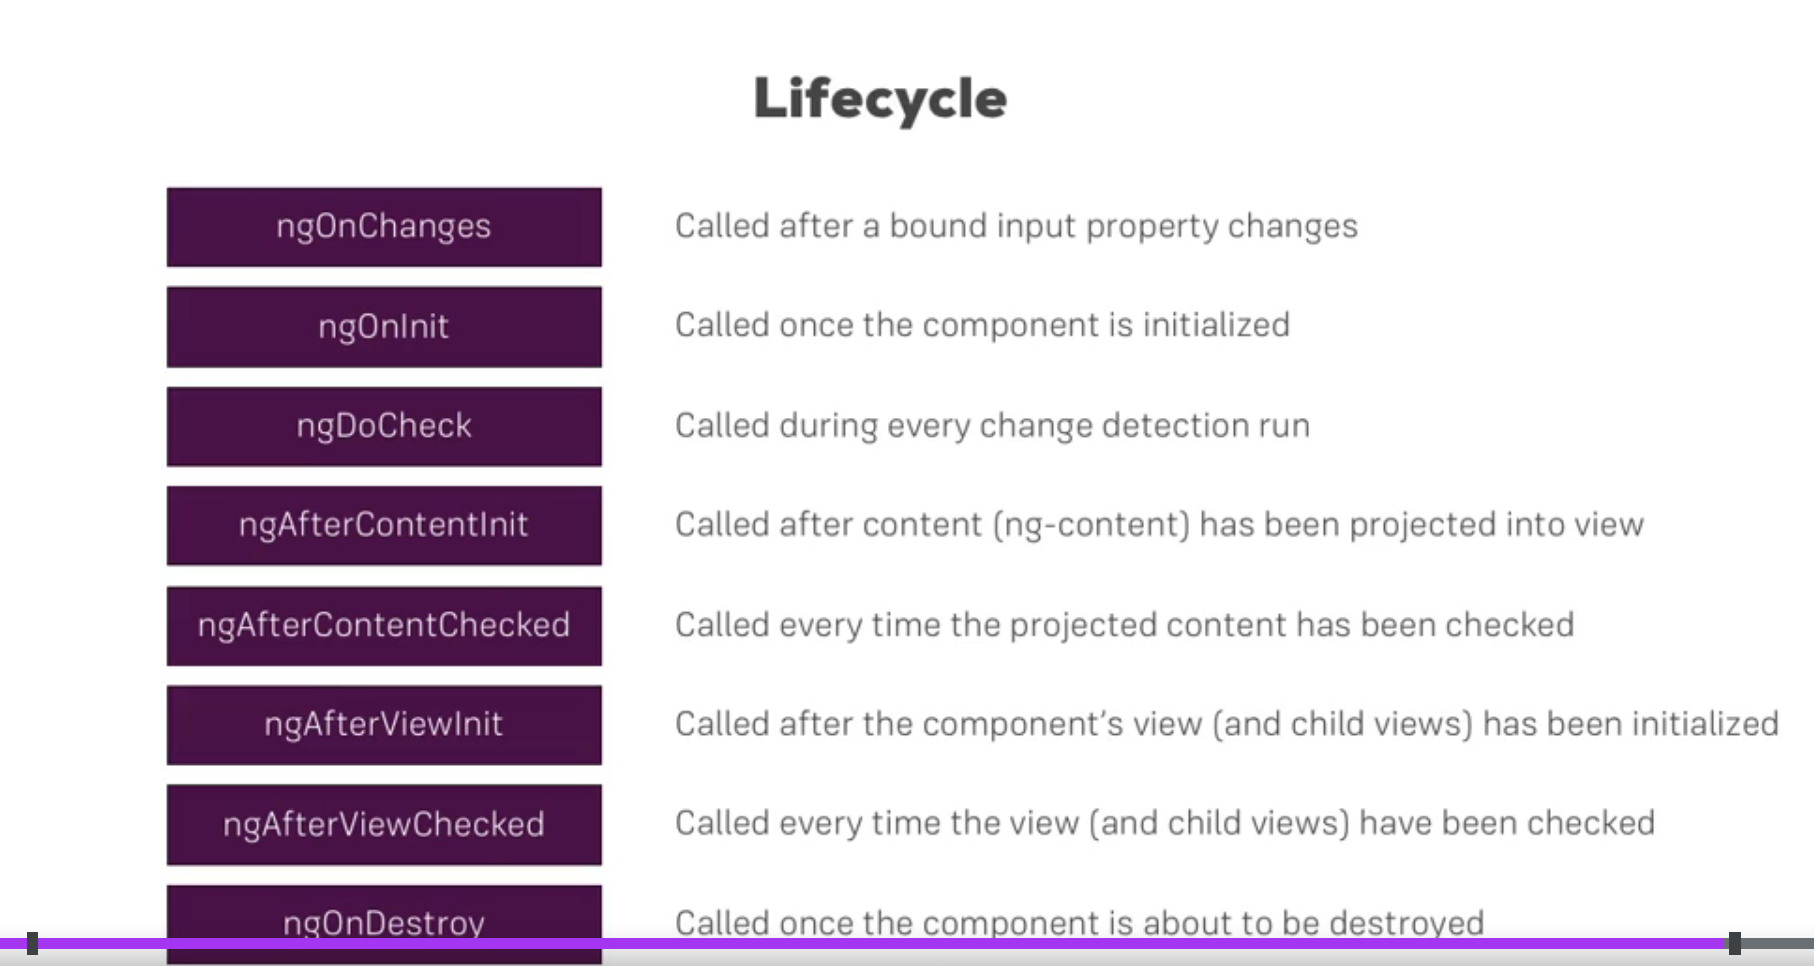

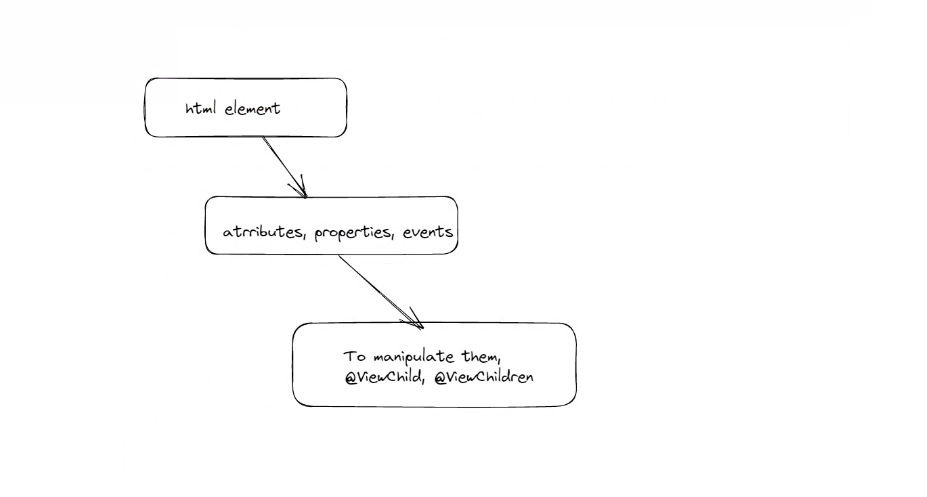

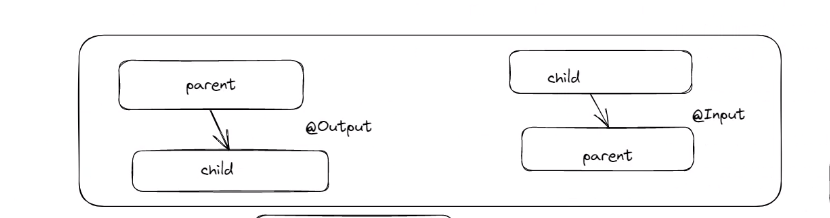

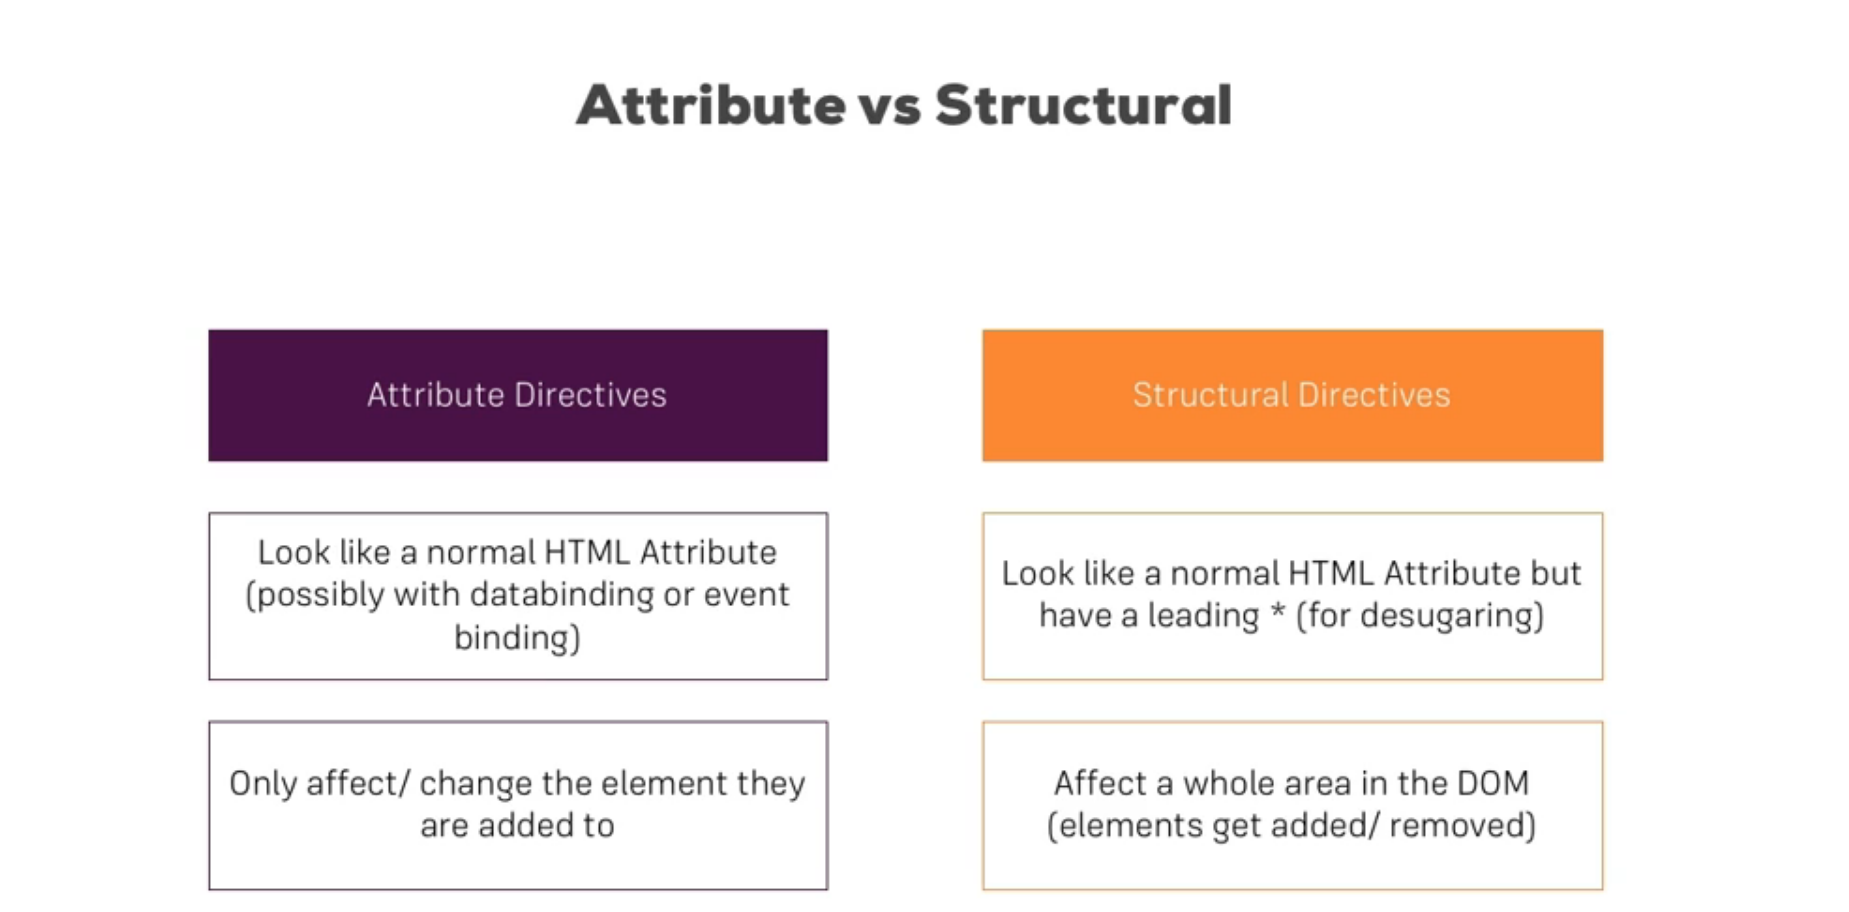

# Directives 

#### In .component.directives.ts


In [ ]:
import { Directive, OnInit, Renderer2 , ElementRef} from '@angular/core';

@Directive({
  selector: '[appBetterHighlight]'
})
export class BetterHighlightDirective implements OnInit{

  constructor(private elRef : ElementRef ,private renderer : Renderer2) { }
  ngOnInit(){
    this.renderer.setStyle(this.elRef.nativeElement , 'background-color', 'blue')
  }
}


In [ ]:
<p appBetterHighlight>Style me with Better Directive</p>

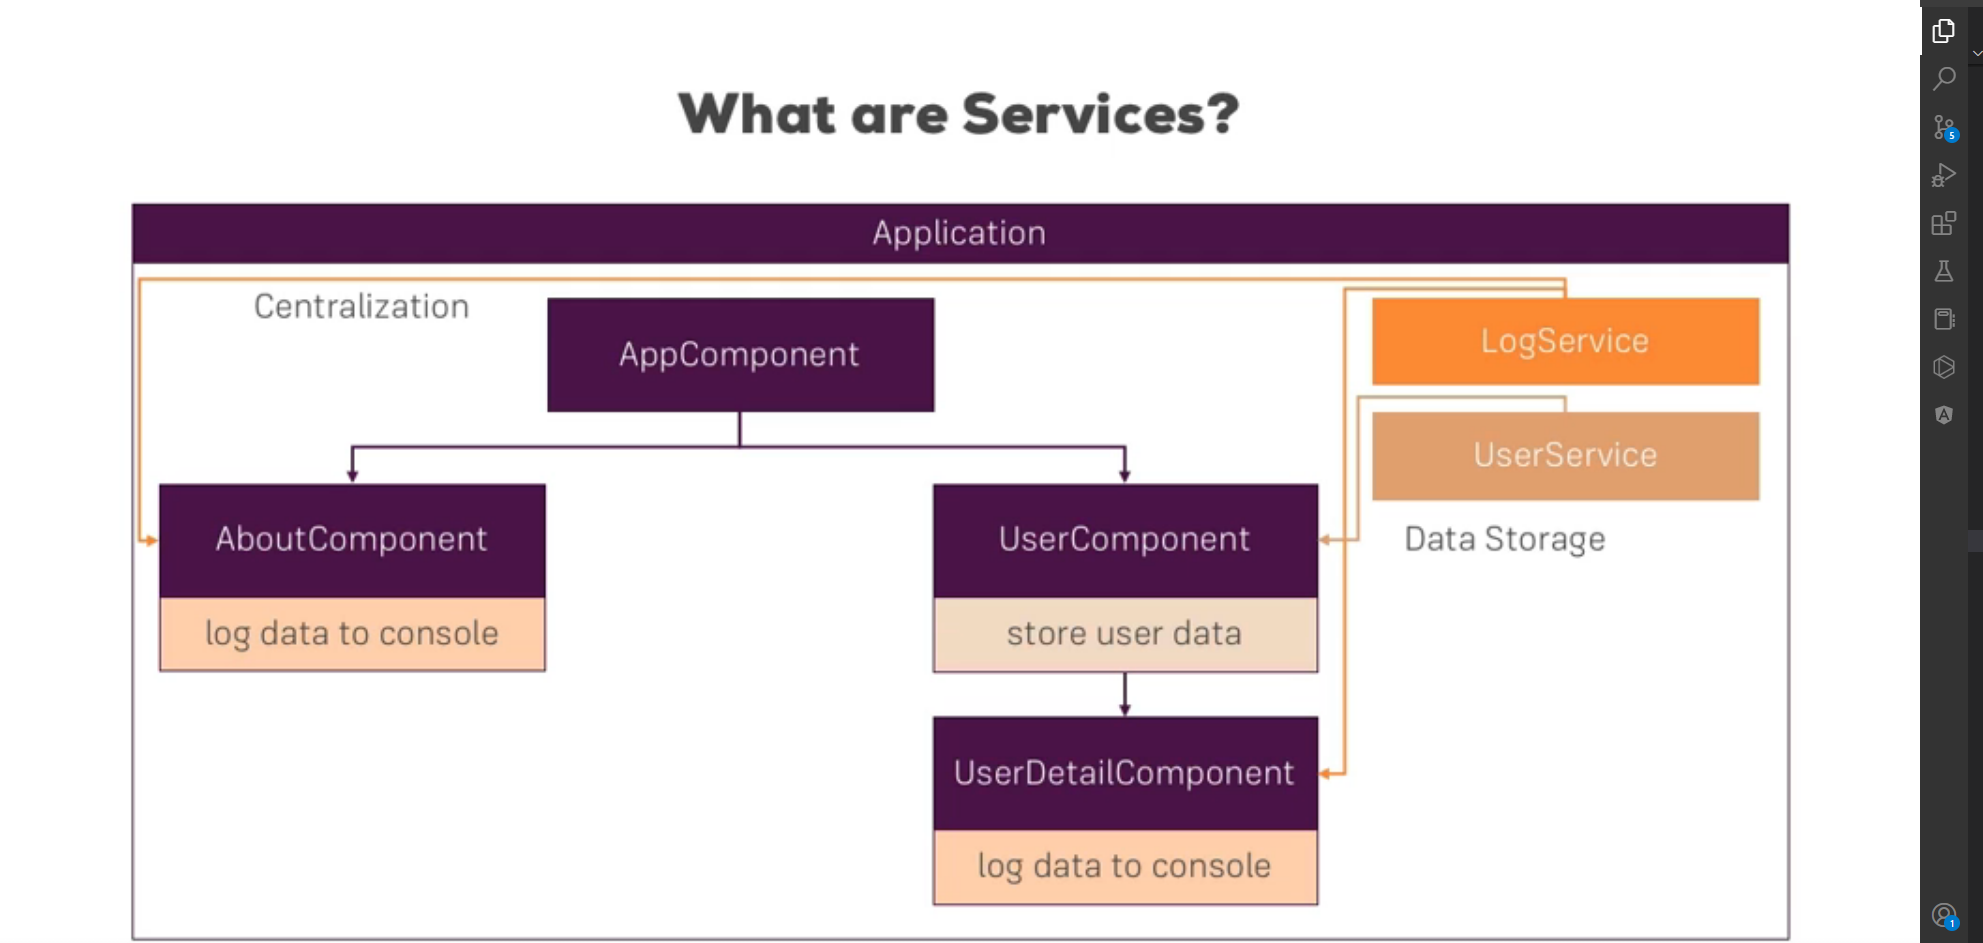

# Services

Like a function dont repeat your code


### created a seperate service file (logging.service.ts)

In [ ]:
export class LoggingService{
  logStatusChange(status :string){
    console.log('A server status changed, new status: ' + status);
  }
}


In [ ]:
#In account.ts
import { LoggingService } from '../logging.service';
@Component({
  selector: 'app-account',
  templateUrl: './account.component.html',
  styleUrls: ['./account.component.css'],
  providers : [LoggingService]
})

constructor(private loggingServer : LoggingService){}
this.loggingServer.logStatusChange(status);

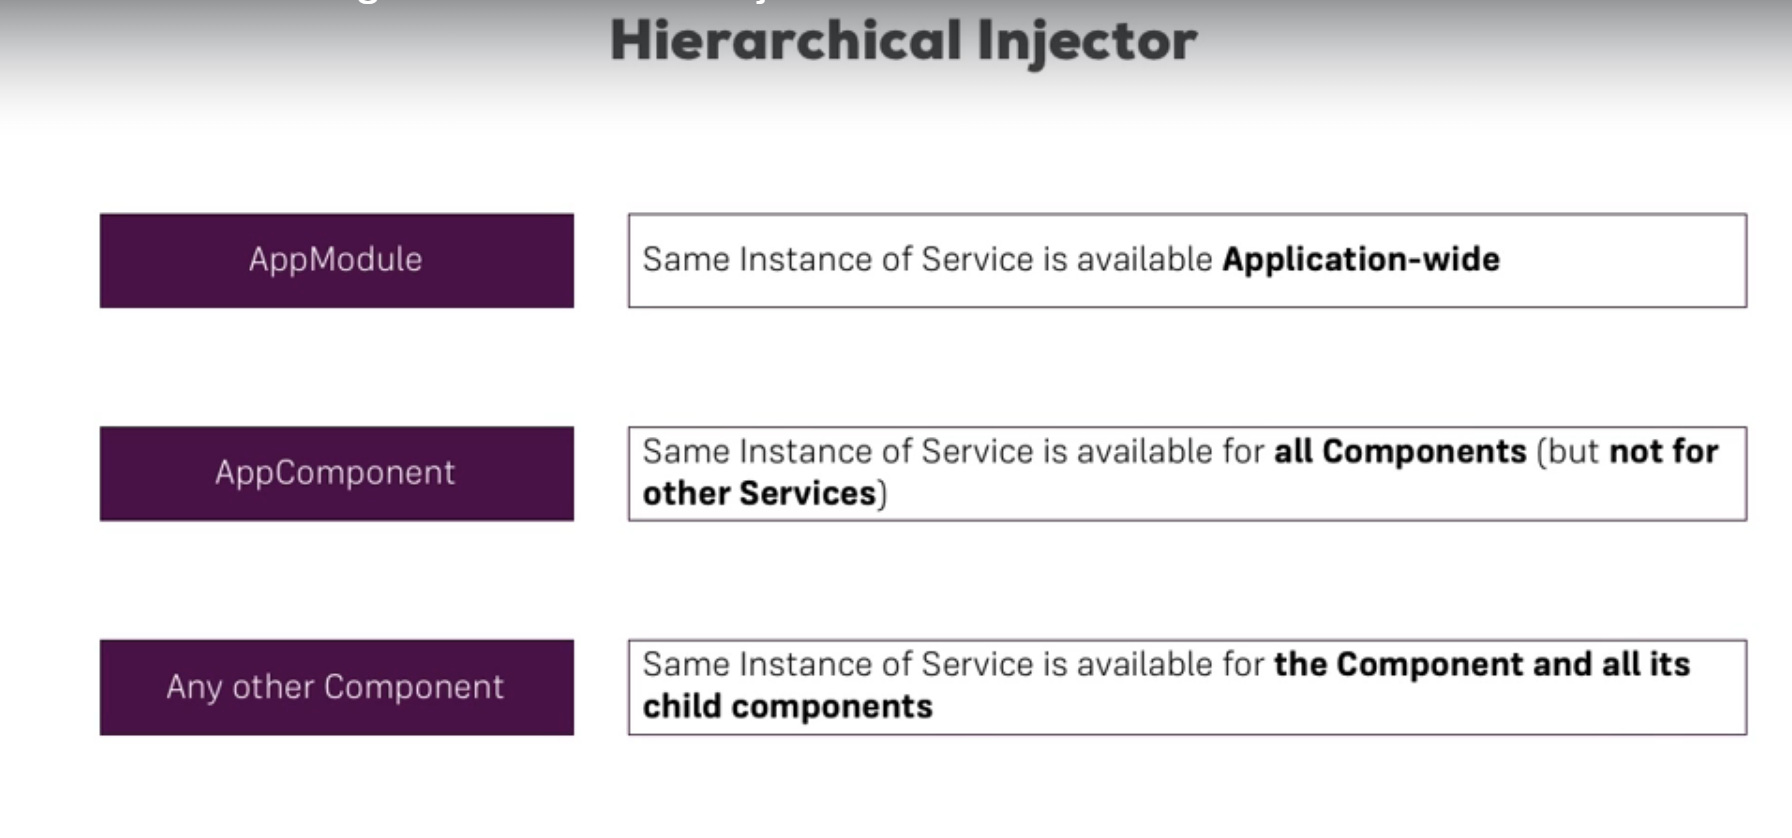

# Services for InterComponent Communication

### In account Service

In [ ]:
statusUpdate = new EventEmitter<string>();

### In Account component

In [ ]:
 onSetTo(status: string) {
    this.accountService.updateStatus(this.id , status);
    this.accountService.statusUpdate.emit(status);#Important
  }

### In New Account 

In [ ]:
 constructor(private loggingService : LoggingService ,
  private accountService : AccountService){

    this.accountService.statusUpdate.subscribe(
      (status : string) => alert('New Status: ' + status)
    );
  }

### For Providing Service in Service

First, Define them in AppModule to make them global then use the @Injector() method and then simply call the other service

# Routing

### In APP Module 

In [ ]:
import { Routes , RouterModule } from '@angular/router';
const appRoutes : Routes = [
  {path : '' , component : HomeComponent},
  {path : 'users' , component : UsersComponent},
  {path : 'servers' , component : ServersComponent}
];

  imports: [
    BrowserModule,
    FormsModule,
    AppRoutingModule,
    RouterModule.forRoot(appRoutes)
  ],

### IN HTML

In [ ]:
 <div class="container">
  <div class="row">
    <div class="col-xs-12 col-sm-10 col-md-8 col-sm-offset-1 col-md-offset-2">
      <ul class="nav nav-tabs">

        <li role="presentation"
        routerLinkActive="active"
        [routerLinkActiveOptions]="{exact : true}"><a routerLink = "/">Home</a></li>

        <li role="presentation" routerLinkActive="active"><a routerLink="servers">Servers</a></li>
        <li role="presentation" routerLinkActive="active"><a routerLink="/users">Users</a></li>
      </ul>
    </div>
  </div>
  <div class="row">
    <div class="col-xs-12 col-sm-10 col-md-8 col-sm-offset-1 col-md-offset-2">
      <router-outlet></router-outlet>
    </div>
  </div>
</div>


## Routing Using Button


#### HTML

In [ ]:

<button class = "btn btn-primary" (click) ="onLoadServers()" >Load Server</button>

#### IN TS


In [ ]:

export class HomeComponent {
  constructor(private router : Router){}
  onLoadServers(){
    this.router.navigate(['/servers']);
  }

}

# Adding a Relative Path 

### In HTML

In [ ]:
<button class = "btn btn-primary" (click) = "onReload()">Reload</button>

### IN TS

In [ ]:
import {Router , ActivatedRoute} from '@angular/router';
 onLoadServers(){
    this.router.navigate(['/servers']);
  }


# Passing Parameters in Routes

In [ ]:
const appRoutes : Routes = [
  {path : '' , component : HomeComponent},
  {path : 'users' , component : UsersComponent},
  {path : 'user/:id/:name' , component : UserComponent}, #Important
  {path : 'servers' , component : ServersComponent}
];


### in HTML

<p>User with ID {{user.id}}.</p>
<p>User name is {{user.name}}</p>


### IN TS

In [ ]:
export class UserComponent {
  user: {id: number, name: string};

  constructor(private route : ActivatedRoute ) { }

  ngOnInit() {
    this.user = {
      id : this.route.snapshot.params['id'],
      name : this.route.snapshot.params['name']
    };
  }
}

# Passing Data to Routes Reactively using Observable

#### IN HTML 

In [ ]:
<a [routerLink]="['/users' , 10 , 'Anna']">Load Anna(10)</a>

### IN TS

In [ ]:
import {ActivatedRoute , Params} from '@angular/router';
ngOnInit() {

    this.route.params.subscribe(
      (params : Params) =>{
        this.user.id = params['id'];
        this.user.name = params['name'];
      }
    )
  }   

# Passing Query Parameters and Fragments 

### In HTML

In [ ]:
<button class = "btn btn-primary" (click) ="onLoadServers(1)" >Load Server 1</button>

### In TS

In [ ]:
onLoadServers(id : number){
    this.router.navigate(['/servers' , id , 'edit'] , {queryParams: {allowEdit : '1'} , fragment : 'loading'});

# Reterving Query Parameters and Fragments

In [ ]:
import { ActivatedRoute } from '@angular/router';

ngOnInit(){
 this.route.queryParams.subscribe()
  this.route.fragment.subscribe()
}

# Setting Up Child Routes

### In APP Module


In [ ]:

const appRoutes : Routes = [
  {path : '' , component : HomeComponent},
  {path : 'users' , component : UsersComponent , children : [
    {path : ':id/:name' , component : UserComponent}
  ]},

  {path : 'servers' , component : ServersComponent , children : [
    {path : ':id/edit' , component : EditServerComponent},
    {path : ':id' , component : ServerComponent}
  ]},

];

### In Server Components

 <router-outlet></router-outlet>

### In User Component

 <router-outlet></router-outlet>

# Configuring the Handling of Query Parameters

### To save the information in url when we are going to other components using routes

In [ ]:
 this.router.navigate(['edit'] , {relativeTo : this.route  , queryParamsHandling : 'preserve'});

# Redirecting and Wildcard Routes

### What happens when we trys to access the page with routes that we don't have

In [ ]:
  {path : 'not-found' , component : PageNotFoundComponent},
  {path : '**' , redirectTo : '/not-found' , pathMatch : 'full'} # Should be atlast parsed from top to bottom

In our example, we didn't encounter any issues when we tried to redirect the user. But that's not always the case when adding redirections.

By default, Angular matches paths by prefix. That means, that the following route will match both /recipes  and just / 

{ path: '', redirectTo: '/somewhere-else' } 

Actually, Angular will give you an error here, because that's a common gotcha: This route will now ALWAYS redirect you! Why?

Since the default matching strategy is "prefix" , Angular checks if the path you entered in the URL does start with the path specified in the route. Of course every path starts with ''  (Important: That's no whitespace, it's simply "nothing").

To fix this behavior, you need to change the matching strategy to "full" :

{ path: '', redirectTo: '/somewhere-else', pathMatch: 'full' } 

Now, you only get redirected, if the full path is ''  (so only if you got NO other content in your path in this example).

# Routing

### To set up Routes

### 1. create a file name app-routing.module.ts
    write export class AppRoutingModule
    Add NgModule decorator
    create appRoutes
    add routes in const appRoutes
    import RouterMoudle in @NgModule and in .forRoot give appRoutes as Arguments
    export RouterModule
    **Go to the App.module.ts**
    and in imports Add AppRoutingModule


In [ ]:
import { NgModule } from "@angular/core";
import { Routes } from "@angular/router";

const appRoutes : Routes = [
  {path: '', redirectTo: '/recipes' , pathMatch : 'full'},
  {path : 'recipes' , component : RecipesComponent},
  {path : 'shopping-list' , component : ShoppingListComponentt}
];


@NgModule({
  imports : [RouterModule.forRoot(appRoutes)],
  exports : [RouterModule]
  
})
export class AppRoutingModule{
}


### IN HTML

In [ ]:
<router-outlet></router-outlet>

#### In HTML From links to Routes

In [ ]:
      <li><a routerLink="/recipes">Recipes</a></li>
      <li><a routerLink = "/shopping-list">Shopping List</a></li>

<router-outlet></router-outlet>

### Marking the active Route 
    Mind the routerLinkActive

In [ ]:
 <li routerLinkActive="active"><a routerLink="/recipes">Recipes</a></li>
<li routerLinkActive="active"><a routerLink = "/shopping-list">Shopping List</a></li>

### For fixing the page reload problem with link can be removed by simply removing href

# Adding a Child Route

Open app-routing.module.ts file
and add Children of a root 

In [ ]:
{path : 'recipes' , component : RecipesComponent , children :[
    {path : "" , component : RecipeStartComponent},
    {path : ":id" , component : RecipeDetailComponent},
  ] },

### IN HTML

In [ ]:
  <div class="col-md-7">
    <router-outlet></router-outlet>
  </div>

### Extracting Values like ID using Router 
    import ActivatedRoute
    in Constructor define ActivatedRoute
    create a const and get the id by route.snapshot.prams.id


In [ ]:
import { ActivatedRoute } from '@angular/router';


export class RecipeDetailComponent {


constructor(private recipeService : RecipeService , 
  private route : ActivatedRoute){}


  ngOnInit(){
  const id = this.route.snapshot.params['id'];
}


}

### OR

    import ActivatedRoute
    in Constructor define ActivatedRoute
    import Params 

In [ ]:
import { ActivatedRoute , Params } from '@angular/router';


id : number;
ngOnInit(){
  this.route.params
  .subscribe(
    (params : Params) =>{
      this.id = +params['id']; # +for converting string to integer
       this.recipe = this.recipeService.getRecipe(this.id);
    }
  )
}


# Routing to different page using Button

#### IN HTML

In [ ]:
  <button class="btn btn-success" (click)="onNewRecipe()">New Recipe</button>

#### IN TS

In [ ]:
import { Recipe } from '../recipe.model';
import { ActivatedRoute, Router } from '@angular/router';

 constructor(private recipeService : RecipeService,
    private router : Router ,
    private route : ActivatedRoute){

  }

   onNewRecipe(){
      this.router.navigate(['new'] , {relativeTo : this.route})
  }


# Observable 

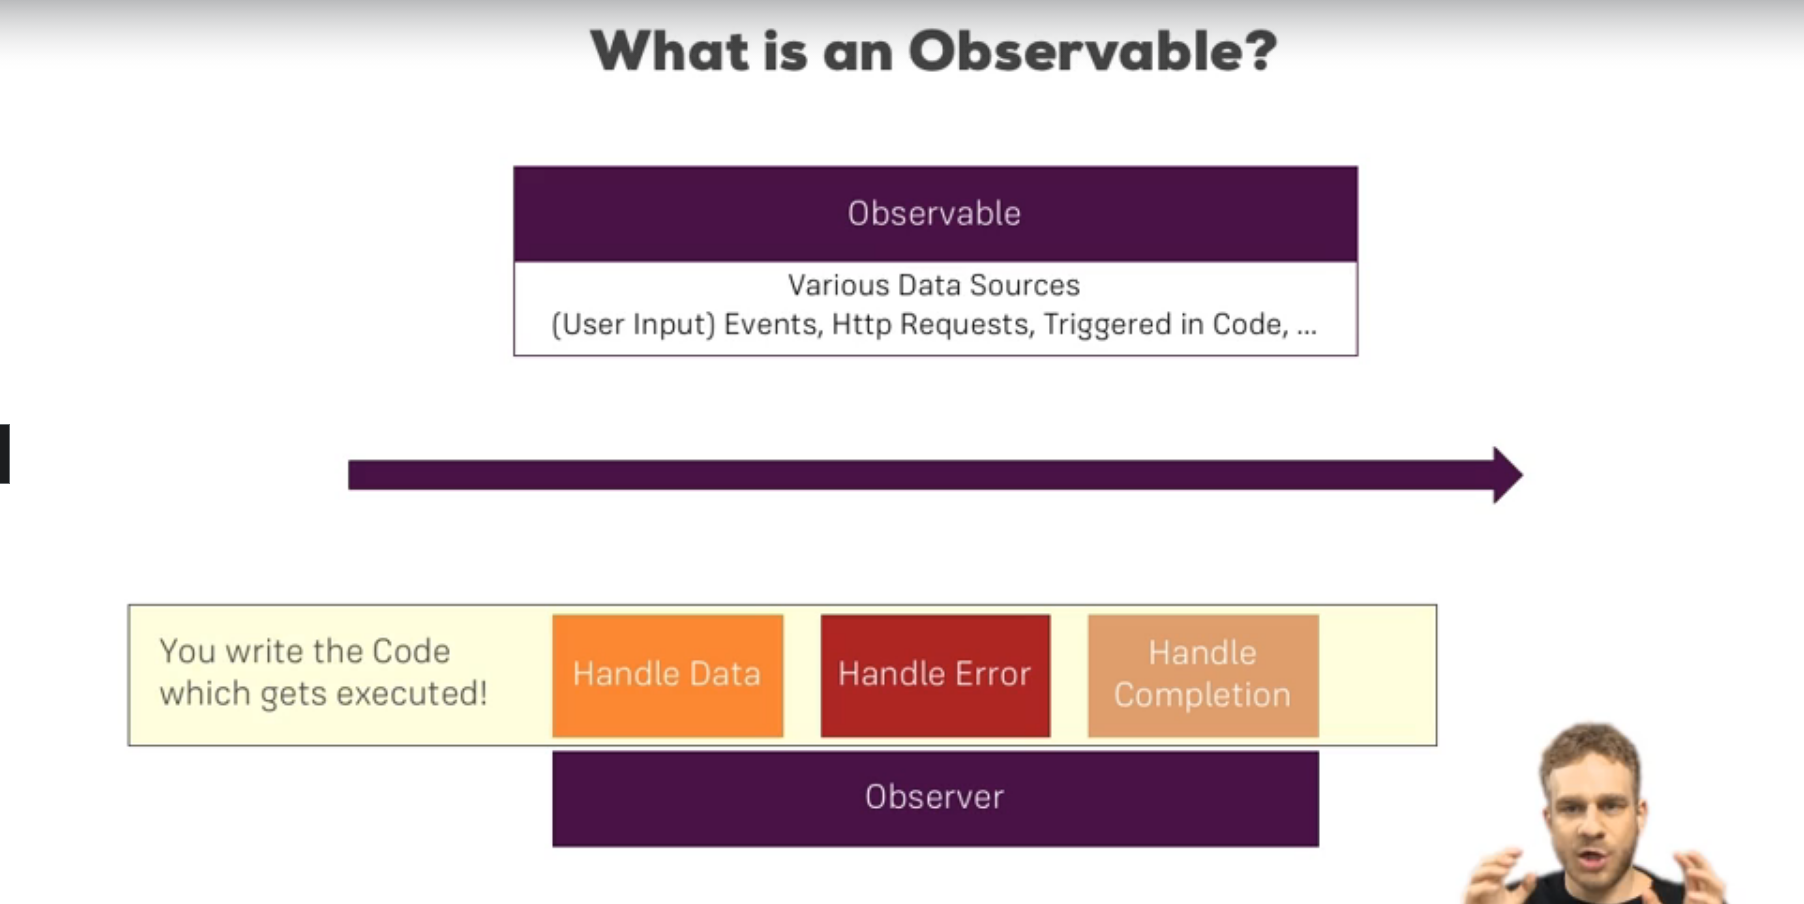

### Creating you own observable

In [ ]:
import {interval , Subscription , Observable} from 'rxjs'


  ngOnInit() {
const customIntervalObserver = Observable.create(observer=>{
      let count = 0;
        setInterval(()=>{
          observer.next(count);
          count++;
        }, 1000)
    });

    this.firstOBsubscription =  customIntervalObserver.subscribe(data=>{
      console.log(data);
    });

### Error and Completion

In [ ]:
  ngOnInit() {
  
  #//  this.firstOBsubscription =  interval(1000).subscribe(count =>{
  #//     console.log(count);
  #//   })

    const customIntervalObserver = Observable.create(observer=>{
      let count = 0;
        setInterval(()=>{
          observer.next(count);
          if(count === 2){
            observer.complete();
          }
          if(count > 3){
            observer.error(new Error('Count is greater than 3'));
          }
          count++;
        }, 1000);
    });

    this.firstOBsubscription =  customIntervalObserver.subscribe(data=>{
      console.log(data);
    } , error =>{
      console.log(error);
      alert(error.message);
    } , ()=>{
      console.log("Completed!")
    });



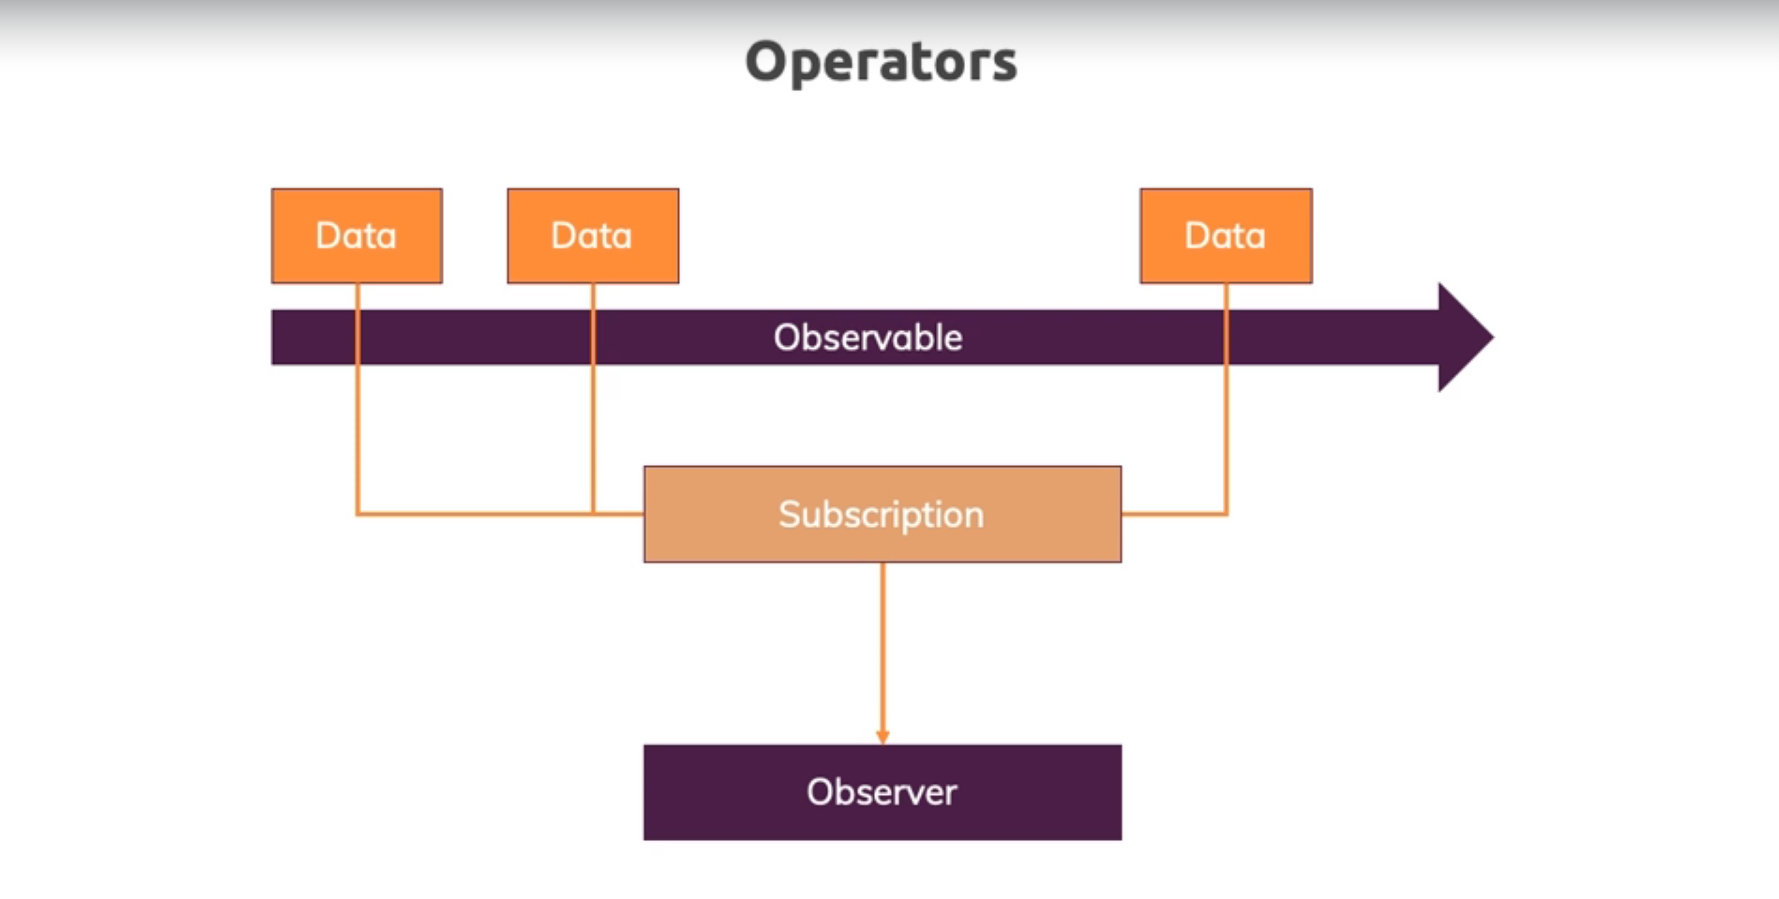

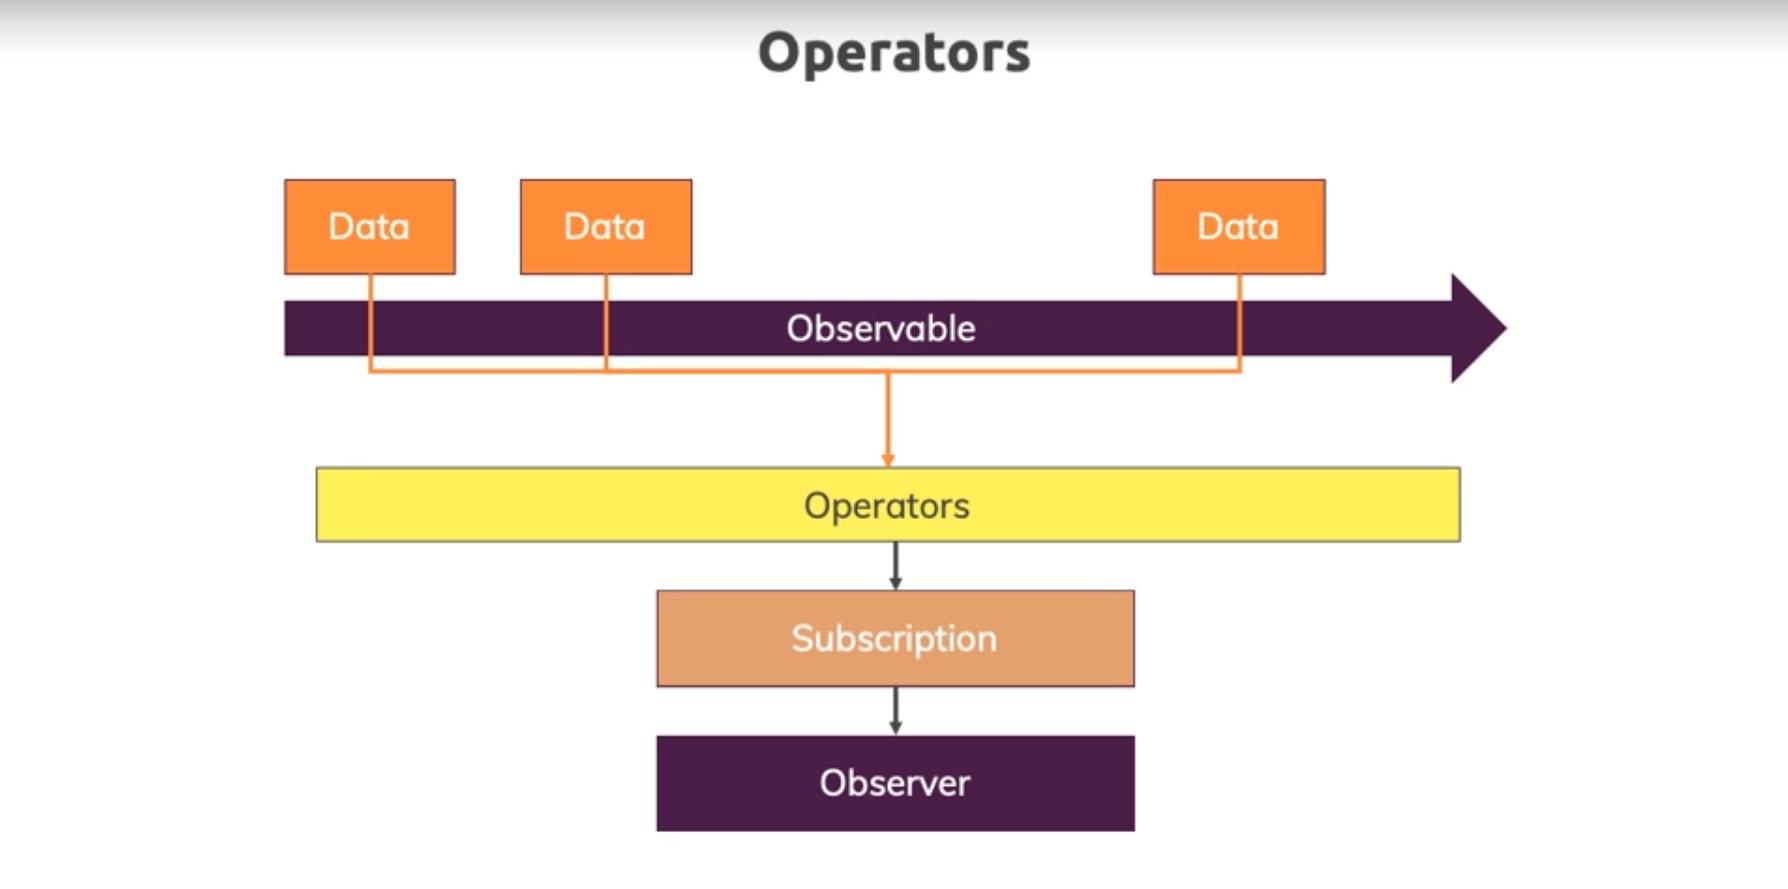

In [ ]:
import { map , filter } from 'rxjs/operators';

# In NgONIT
  this.firstOBsubscription =   customIntervalObserver.pipe(filter(data=>{
      return data > 0;
    }),map((data:number)=>{
      return 'Round : '+ (data + 1);
  })).subscribe(data=>{
      console.log(data);
    } , error =>{
      console.log(error);
      alert(error.message);
    } , ()=>{
      console.log("Completed!")
    });